In [88]:
import pandas as pd
import numpy as np


In [89]:
housing=pd.read_csv("C:/Users/SHUBHAM/Desktop/data/housing/housing.csv")

In [90]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

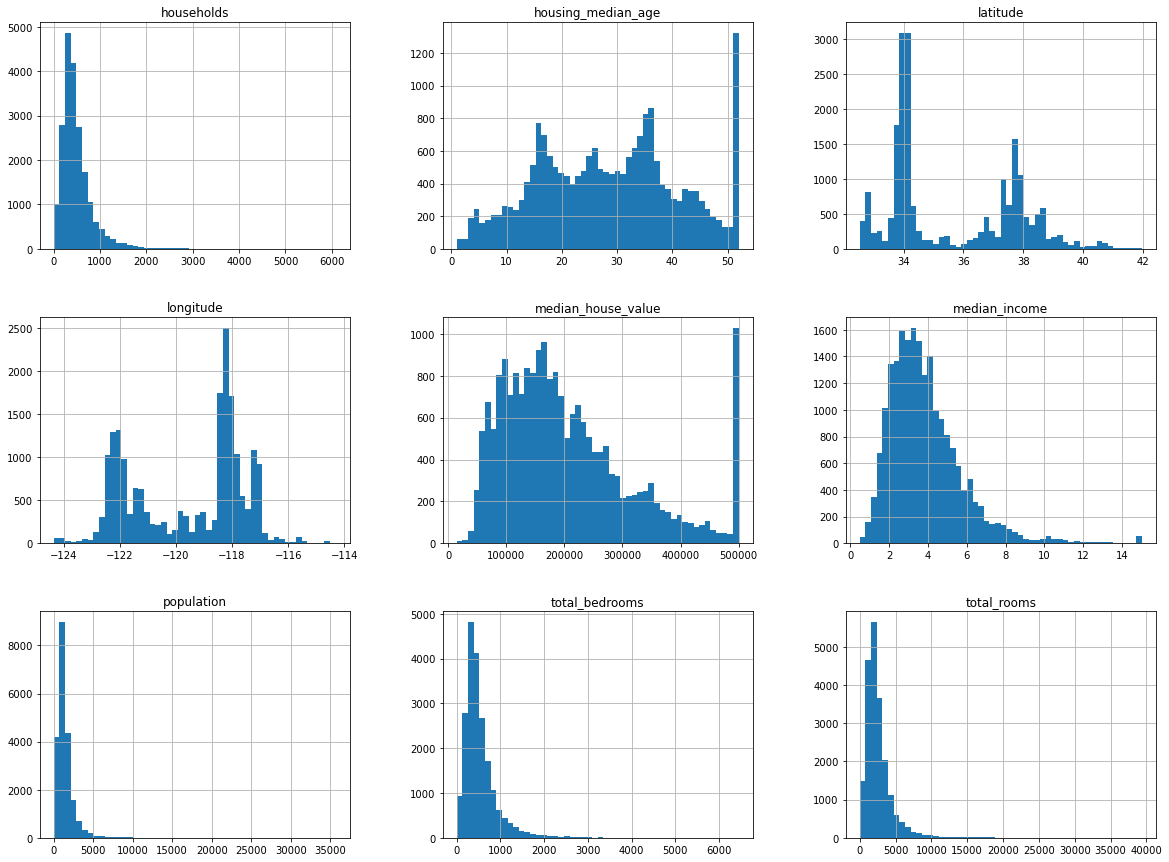

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
train_set,test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [95]:
housing.size

206400

In [96]:
train_set.size+test_set.size

206400

In [97]:
test_set.size

41280

In [98]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

In [99]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


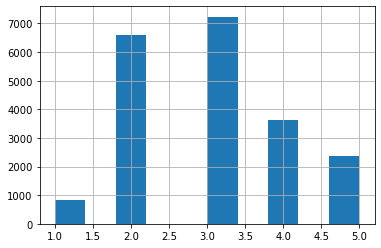

In [100]:
housing['income_cat'].hist()

In [101]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [102]:
for train_index, test_index in split.split(housing, housing["income_cat"]):    
    strat_train_set = housing.loc[train_index]    
    strat_test_set = housing.loc[test_index] 

In [103]:
strat_train_set.size+strat_test_set.size

227040

In [104]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [105]:
strat_train_set.drop('income_cat', axis=1,inplace=True)
strat_test_set.drop('income_cat', axis=1,inplace=True)

In [106]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [107]:
strat_test_set


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [108]:
newtrain=strat_train_set.copy()

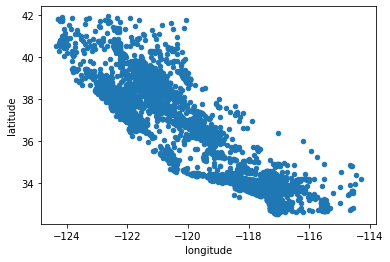

In [109]:
newtrain.plot(kind='scatter',x='longitude',y='latitude')

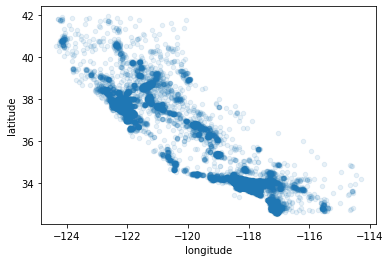

In [110]:
newtrain.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

Text(0, 0.5, 'latitude')

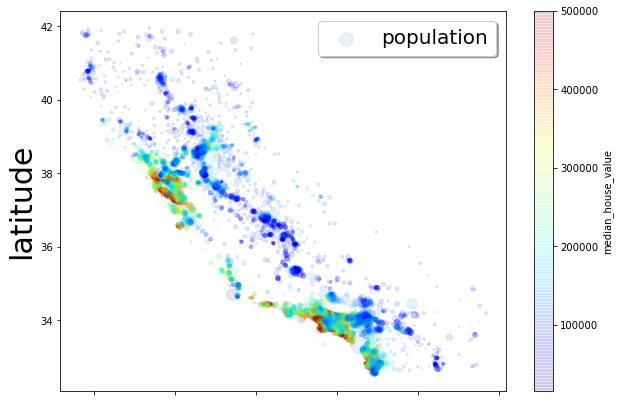

In [111]:
newtrain.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1, s=newtrain['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend(loc='best',fontsize=20,shadow=True)
plt.xlabel('longitute',fontsize=30)
plt.ylabel('latitude',fontsize=30)


In [112]:
cor_matrix=newtrain.corr()

In [113]:
cor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [114]:
newtrain['pop_per_household']=newtrain['population']/newtrain['households']
newtrain['rooms_per_households']=newtrain['total_rooms']/newtrain['households']
newtrain['bedrooms_per_rooms']=newtrain['total_bedrooms']/newtrain['total_rooms']

In [115]:
newtrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_household,rooms_per_households,bedrooms_per_rooms
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.094395,4.625369,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,2.707965,6.008850,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.025974,4.225108,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,4.135977,5.232295,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.047847,4.505810,0.231341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,2.728571,6.052381,0.185681
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.077519,4.635659,0.245819
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,2.742484,6.346405,0.179609
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.808989,5.505618,0.193878


In [116]:
cor_matrix=newtrain.corr()
cor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687160
rooms_per_households    0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
pop_per_household      -0.021985
population             -0.026920
longitude              -0.047432
latitude               -0.142724
bedrooms_per_rooms     -0.259984
Name: median_house_value, dtype: float64

In [117]:
cc=strat_train_set.copy()

In [118]:
cc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [119]:
housing=cc.drop('median_house_value',axis=1)

In [120]:
housing_label=cc['median_house_value'].copy()
housing.size

148608

In [121]:
housing_label

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [122]:
from sklearn.impute import SimpleImputer

In [123]:
imputer=SimpleImputer(strategy='median')


In [124]:
housing_num=housing.drop('ocean_proximity',axis=1)


In [125]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [126]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [127]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [128]:
X=imputer.transform(housing_num)

In [129]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [130]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [131]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [132]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()

In [133]:
housing_cat=housing[['ocean_proximity']]

#housing_cat1hot=cat_encoder.fit_transform(housing_cat)

In [134]:
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [135]:
from sklearn.preprocessing import OrdinalEncoder

In [136]:
ordinal_encoder=OrdinalEncoder()

In [137]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [138]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_1hot=cat_encoder.fit_transform(housing_cat)

In [139]:
housing_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [140]:
housing_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [141]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [142]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")),
                          
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num) 

In [143]:
#from sklearn.compose import ColumnTransformer 
#num_attribs = list(housing_num) 
#cat_attribs = ["ocean_proximity"] 
#full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),  ("cat", OneHotEncoder(), cat_attribs),    ]) 
#housing_prepared = full_pipeline.fit_transform(housing)

In [144]:
house_prep=housing_num_tr.copy()
#house_prep=pd.DataFrame(house_prep, columns=housing_num.columns, index=housing_num.index)

house_prep

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lr=LinearRegression()

In [147]:
lr.fit(house_prep,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
housing_label
housing=housing.drop('ocean_proximity',axis=1)


In [149]:
some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [150]:
some_data_prep=num_pipeline.fit_transform(some_data)

In [151]:
print("Predictions:", lr.predict(some_data_prep))

Predictions: [203723.92195291 344150.71715595 224395.22578382  66469.48551753
 196215.2532114 ]


In [152]:
print("labels: ", list(some_labels))

labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [153]:
from sklearn.metrics import mean_squared_error

In [154]:
house_pred=lr.predict(house_prep)

In [155]:
mse=mean_squared_error(housing_label,house_pred)

In [156]:
rmse=np.sqrt(mse)

In [157]:
rmse

69958.3994032614

In [158]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(house_prep,housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [159]:
treepred=tree_reg.predict(house_prep)

In [160]:
tree_mse=mean_squared_error(treepred,housing_label)
treermse=np.sqrt(tree_mse)
treermse

0.0

In [161]:
from sklearn.model_selection import cross_val_score
treescore=cross_val_score(tree_reg, house_prep, housing_label, scoring='neg_mean_squared_error', cv=10)

In [162]:
tree_rmse_score=np.sqrt(-treescore)

In [163]:
def results(scores):
    print("scores: ", scores)
    print("mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [164]:
results(tree_rmse_score)

scores:  [67810.5821801  68259.24949818 72852.76230739 70138.46281033
 69558.7897739  72622.06708728 70557.52932318 67787.29405853
 70396.39621665 72141.2512806 ]
mean:  70212.43845361366
Standard Deviation:  1804.128107340748


In [165]:
linscore=cross_val_score(lr, house_prep, housing_label, scoring='neg_mean_squared_error',cv=10)
lin_rmse_score=np.sqrt(-linscore)

In [166]:
results(lin_rmse_score)

scores:  [68231.8739688  68498.24540696 69602.95540263 74953.53757784
 68963.39008985 72142.21999409 66587.92731065 69747.54809465
 73515.43621253 68938.5043212 ]
mean:  70118.16383792048
Standard Deviation:  2465.5991562426093


In [167]:
linscore

array([-4.65558863e+09, -4.69200962e+09, -4.84457140e+09, -5.61803280e+09,
       -4.75594917e+09, -5.20449991e+09, -4.43395206e+09, -4.86472047e+09,
       -5.40451936e+09, -4.75251738e+09])

In [184]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()



In [181]:
randomforest.fit(house_prep,housing_label)
randomforestscore=cross_val_score(randomforest, house_prep, housing_label, scoring='neg_mean_squared_error', cv=10)
randomforestscore


array([-2.27298505e+09, -2.17951956e+09, -2.46643962e+09, -2.67501881e+09,
       -2.48993481e+09, -2.78455830e+09, -2.45865976e+09, -2.57835270e+09,
       -2.68493525e+09, -2.50343458e+09])

In [182]:
random_rmse_score=np.sqrt(-randomforestscore)
randomforestscore

array([-2.27298505e+09, -2.17951956e+09, -2.46643962e+09, -2.67501881e+09,
       -2.48993481e+09, -2.78455830e+09, -2.45865976e+09, -2.57835270e+09,
       -2.68493525e+09, -2.50343458e+09])

In [185]:
results(random_rmse_score)

scores:  [47675.83294326 46685.32492644 49663.26232632 51720.58399951
 49899.24659539 52768.91409868 49584.87430629 50777.48220342
 51816.36082752 50034.33396604]
mean:  50062.62161928606
Standard Deviation:  1765.7179890551708
